### Motifs detection by G-trie
each co-authorship network generated from papers supported by a core project

In [1]:
import os
os.getcwd()

'/media/bentao/ecosystem_01'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import json

In [3]:
met = pd.read_csv('/media/bentao/ecosystem_01/data/net_metrics/nets_metrics_merged.csv')
print(met.shape[0])
met.sample(3)

148158


,CORE_PROJECT_NUM,Nodes,Edges,Nodes_lcc,Edges_lcc,avg_degree,avg_weighted_degree,density,avg_clus_coeff,weighted_avg_clus_coeff
19907,K01DA039030,53,214,53,214,8.0755,3.5097,0.1553,0.8670,0.0385
48828,Z01AI000677,52,311,52,311,11.9615,1.5576,0.2345,0.9089,0.1197
33097,P01AM020586,59,161,48,150,5.4576,1.6611,0.0941,0.8240,0.0621


In [45]:
met[met.Nodes == 60].sample(5)

,CORE_PROJECT_NUM,Nodes,Edges,Nodes_lcc,Edges_lcc,avg_degree,avg_weighted_degree,density,avg_clus_coeff,weighted_avg_clus_coeff
61472,N01MH080008,60,575,60,575,19.1667,3.9902,0.3249,0.8257,0.0522
124582,R01GM102203,60,267,50,222,8.9000,1.2834,0.1508,0.9458,0.0569
27180,R01DC014160,60,711,45,606,23.7000,1.0165,0.4017,0.9824,0.0979
125306,R01HL070628,60,278,60,278,9.2667,1.5834,0.1571,0.8859,0.1081
40020,U13HS019564,60,204,37,132,6.8000,1.0667,0.1153,0.9147,0.1035


In [54]:
met[['Nodes', 'density']].describe()

,Nodes,density
count,148158.000000,148158.000000
mean,119.592226,0.228218
std,395.048912,0.146918
min,2.000000,0.001300
25%,28.000000,0.121900
50%,50.000000,0.200900
75%,99.000000,0.300300
max,54181.000000,1.000000


In [70]:
kk = ['R01DA022386', 'UH2TR000960', 'R01MH068469', 'U01AI075641',
      'R01CA038921', 'U10HD019897', 'P20MD004811', 'R01DA008163',
      'R00DA032681', 'U01HL054485', 'R01ES007062', 'S10OD016361',
      'R01DK085516', 'T32NS062443', 'U01NS052220', 'R01DA035923',
      'T32ES007267']
spring = ['R56AI091832', 'R01GM092660', 'U01DK085649', 'U01NS044364',
          'R01NS020147', 'R01AI065335', 'R01CA124924', 'Z01DE000695',
          'P01AG051449', 'K08DK100638', 'R01HG004160']

all_bad = ['R01ES021446', 'T32GM095450', 'P50AR054083', 'U01NS052220']

In [58]:
df = met[met.Nodes == 160].sample(5)
print(df.CORE_PROJECT_NUM)
for proj in df.CORE_PROJECT_NUM:
# proj = 'U13HS019564'
    g = load_net(proj)
    mapping, h = transform_net(g)
    store_map(mapping, proj)
    plt_fig_spring(h, proj)
    plt_fig_kamk(h, proj)

54514    ZIAES102385
78401    T32ES007267
86690    R01DA035923
29994    U01NS052220
89355    P50AR054083
Name: CORE_PROJECT_NUM, dtype: object


In [13]:
net_path = './data/coau_nets/pajek/'
input_path = './motif_detection/gtrie/proj_coau/'
motif_path = './motif_detection/gtrie/motifs/'
node_motif_path = './motif_detection/gtrie/node-motif/'
map_path = './motif_detection/mappings/'
fig_path = './motif_detection/graph_figs/'

In [24]:
def load_net(proj):
    g = nx.read_pajek(net_path+proj+'.net')
    return g

def store_map(mp, proj):
    with open(map_path+proj+'.json', 'w') as write_js:
        json.dump(mp, write_js)
    
def transform_net(g):
    mapping = {}
    i = 1
    for n in g.nodes():
        mapping[n] = i
        i += 1

    h = nx.relabel_nodes(g, mapping)
    
    return mapping, h

def plt_fig_spring(h, proj):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ns = 15

    pos = nx.spring_layout(h, scale=1, iterations=200)
    nx.draw_networkx_nodes(h, pos=pos, node_size=ns)
    nx.draw_networkx_edges(h, pos=pos, edge_color='g', alpha=.2)
    
    
    plt.savefig(fig_path+proj+'.png', dpi=300, bbox_inches='tight',
                pad_inches=0)
    plt.close(fig)

# kamada_kawai results in better layout when the graph density is lower than 0.1(0.11)
# but when the number of graph node is at hundreds level, it performs less well
# and often, larger graphs are likely to have lower density, e.g., R01GM121317 (500 nodes, d=0.08)
# U01HG004608 (800 nodes, d=0.07)
# with spring layout, you can see clearer clusters, while kamada layout produces less 
# straitforward ones

# when there are un-connected components in a graph, kamada layout outperforms the spring
def plt_fig_kamk(h, proj):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ns = 15

    pos = nx.kamada_kawai_layout(h, scale=1.5)
    nx.draw_networkx_nodes(h, pos=pos, node_size=ns)
    nx.draw_networkx_edges(h, pos=pos, edge_color='g', alpha=.2)
    
#     plt.close(fig)
    plt.savefig(fig_path+proj+'kk.png', dpi=300, bbox_inches='tight',
                pad_inches=0)
    plt.close(fig)

# proj = 'R01AG022559'
# g = load_net(proj)
# mapping, h = transform_net(g)
# store_map(mapping, proj)
# plt_fig_spring(h, proj)
# plt_fig_kamk(h, proj)

In [68]:
import math
math.sqrt(4)

2.0

In [71]:
nlist = []
for proj in kk:
    g = nx.read_pajek(net_path+proj+'.net')

    # relabel nodes
    mapping = {}
    i = 1
    for n in g.nodes():
        mapping[n] = i
        i += 1

    h = nx.relabel_nodes(g, mapping)
    
    n = h.number_of_nodes()
    nlist.append(round(1/math.sqrt(n), 4))

In [72]:
nlist

[0.1414,
 0.1414,
 0.1291,
 0.1291,
 0.1195,
 0.1195,
 0.1195,
 0.1054,
 0.1,
 0.1,
 0.0953,
 0.0913,
 0.0845,
 0.0816,
 0.0791,
 0.0791,
 0.0791]

In [ ]:
kk = ['R01DA022386', 'UH2TR000960', 'R01MH068469', 'U01AI075641',
      'R01CA038921', 'U10HD019897', 'P20MD004811', 'R01DA008163',
      'R00DA032681', 'U01HL054485', 'R01ES007062', 'S10OD016361',
      'R01DK085516', 'T32NS062443', 'U01NS052220', 'R01DA035923',
      'T32ES007267']

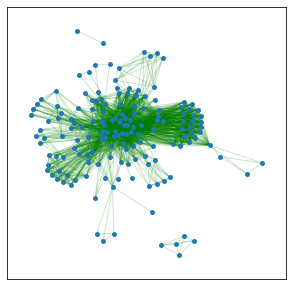

In [89]:
# net_path = '/media/bentao/ecosystem_01/data/coau_nets/pajek/'
proj = 'U01NS052220'
g = nx.read_pajek(net_path+proj+'.net')

# relabel nodes
mapping = {}
i = 1
for n in g.nodes():
    mapping[n] = i
    i += 1
    
h = nx.relabel_nodes(g, mapping)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ns = 15

pos = nx.spring_layout(h, k=.2, scale=1.5)
nx.draw_networkx_nodes(h, pos=pos, node_size=ns)
nx.draw_networkx_edges(h, pos=pos, edge_color='g', alpha=.2)
plt.show()
# plt.savefig(fig_path+proj+'kk.png', dpi=300, bbox_inches='tight',
#             pad_inches=0)


In [96]:
! tree /home/bentao/Desktop/Visualizations/

/home/bentao/Desktop/Visualizations/
└── graphs
    └── NetworkX

2 directories, 0 files


In [4]:
proj = 'R01AG022559'
g = nx.read_pajek(net_path+proj+'.net')

# relabel nodes
mapping = {}
i = 1
for n in g.nodes():
    mapping[n] = i
    i += 1
    
h = nx.relabel_nodes(g, mapping)

# # write network in G-Trie input format
# input_path = '/home/bentao/Desktop/gtrie/gtrieScanner_src_01/'
# with open(input_path+proj+'.txt', 'wb') as fr:
#     nx.write_edgelist(h, fr, data=False)

In [12]:
! mkdir /media/bentao/ecosystem_01/motif_detection/graph_figs

In [7]:
with open('./motif_detection/mappings/'+proj+'.json', 'w') as write_js:
    json.dump(mapping, write_js)

In [8]:
with open('./motif_detection/mappings/'+proj+'.json') as load_js:
    dic = json.load(load_js)

In [9]:
type(dic)

dict

In [10]:
dic

{'9648030': 1,
 '2541700': 2,
 '1273740': 3,
 '675592': 4,
 '9955297': 5,
 '9955295': 6,
 '3671002': 7,
 '10139016': 8,
 '229887': 9,
 '1424454': 10,
 '294412': 11,
 '7522241': 12,
 '225726': 13,
 '2150149': 14,
 '357177': 15,
 '10449621': 16,
 '10449622': 17,
 '10449623': 18,
 '9955296': 19,
 '4386380': 20,
 '7503615': 21,
 '5037194': 22,
 '6365228': 23,
 '2702787': 24,
 '7631240': 25,
 '5136744': 26,
 '2611345': 27,
 '8008152': 28,
 '4325358': 29,
 '2427343': 30,
 '9456481': 31,
 '7631382': 32,
 '9456482': 33,
 '7122644': 34,
 '9032312': 35,
 '1417661': 36,
 '2838563': 37,
 '1978839': 38,
 '3354513': 39,
 '8692224': 40,
 '6706802': 41,
 '2124226': 42,
 '3021366': 43,
 '765262': 44,
 '1956623': 45,
 '4492034': 46,
 '9454275': 47,
 '2408956': 48,
 '10057152': 49,
 '12096117': 50}